# Dataset

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Datasets/marketing_sales_data.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = data[['Radio', 'Social Media', 'Sales']]
data = data.dropna()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=['Radio', 'Social Media', 'Sales'])
data.head()

,Radio,Social Media,Sales
0,-1.808070,-0.898526,-1.146910
1,-0.380950,-1.352277,0.321089
2,-0.856177,-1.449071,-1.006175
3,0.816280,1.744041,1.488272
4,1.897891,1.993542,1.749018


In [7]:
data[['Radio', 'Social Media', 'Sales']].corr()

,Radio,Social Media,Sales
Radio,1.000000,0.611683,0.870763
Social Media,0.611683,1.000000,0.532200
Sales,0.870763,0.532200,1.000000


In [8]:
df = data[['Radio', 'Sales']]
df.head()

,Radio,Sales
0,-1.808070,-1.146910
1,-0.380950,0.321089
2,-0.856177,-1.006175
3,0.816280,1.488272
4,1.897891,1.749018


# GD

In [9]:
w = np.array([1, 2])
x = np.array([-1.808070, -0.898526])
b = 0.1

In [96]:
def linear_function(x, w):
    """Calculate y_hat using a linear function."""
    t = np.dot(x, w)
    y_hat = t
    return y_hat


def calculate_loss(y, y_hat):
    """Calculate loss function."""
    cost = (y - y_hat)**2
    loss = np.mean(cost, axis = 0)
    return loss


def gradient_descent(y, y_hat, x, w, b, alpha, dLdw, dLdb):
    """Find w, b using gradient descent"""
    
    w = w - alpha*dLdw
    b = b - alpha*dLdb
    #print(dLdw)
    return w, b




In [80]:
w0_range = np.linspace(-6, 6, 300)
w1_range = np.linspace(-6, 6, 300)
w0_mesh, w1_mesh = np.meshgrid(w0_range, w1_range)
w0_mesh, w1_mesh

(array([[-6.        , -5.95986622, -5.91973244, ...,  5.91973244,
          5.95986622,  6.        ],
        [-6.        , -5.95986622, -5.91973244, ...,  5.91973244,
          5.95986622,  6.        ],
        [-6.        , -5.95986622, -5.91973244, ...,  5.91973244,
          5.95986622,  6.        ],
        ...,
        [-6.        , -5.95986622, -5.91973244, ...,  5.91973244,
          5.95986622,  6.        ],
        [-6.        , -5.95986622, -5.91973244, ...,  5.91973244,
          5.95986622,  6.        ],
        [-6.        , -5.95986622, -5.91973244, ...,  5.91973244,
          5.95986622,  6.        ]]),
 array([[-6.        , -6.        , -6.        , ..., -6.        ,
         -6.        , -6.        ],
        [-5.95986622, -5.95986622, -5.95986622, ..., -5.95986622,
         -5.95986622, -5.95986622],
        [-5.91973244, -5.91973244, -5.91973244, ..., -5.91973244,
         -5.91973244, -5.91973244],
        ...,
        [ 5.91973244,  5.91973244,  5.91973244, ...,  

In [81]:
w0_w1 = np.array([w0_mesh.ravel(), w1_mesh.ravel()])
w0_w1.shape

(2, 90000)

In [82]:
X = df['Radio'].values
X = np.c_[np.ones(X.shape[0]), X]
y = df['Sales'].values
X.shape,y.shape

((570, 2), (570,))

In [83]:
y_hat = linear_function(X, w0_w1)
y_hat.shape

(570, 90000)

In [ ]:
loss = calculate_loss(y.reshape(-1, 1), y_hat)
loss.shape
loss

array([83.44915927, 82.96916464, 82.49239145, ..., 61.59407291,
       62.0708461 , 62.55084073])

In [ ]:
loss_mesh = loss.reshape(w0_mesh.shape)
loss_mesh

array([[83.44915927, 82.96916464, 82.49239145, ..., 82.49239145,
        82.96916464, 83.44915927],
       [82.8992706 , 82.41927597, 81.94250278, ..., 81.94250278,
        82.41927597, 82.8992706 ],
       [82.35260337, 81.87260873, 81.39583554, ..., 81.39583554,
        81.87260873, 82.35260337],
       ...,
       [61.73386099, 61.25386636, 60.77709317, ..., 60.77709317,
        61.25386636, 61.73386099],
       [62.14074014, 61.66074551, 61.18397232, ..., 61.18397232,
        61.66074551, 62.14074014],
       [62.55084073, 62.0708461 , 61.59407291, ..., 61.59407291,
        62.0708461 , 62.55084073]])

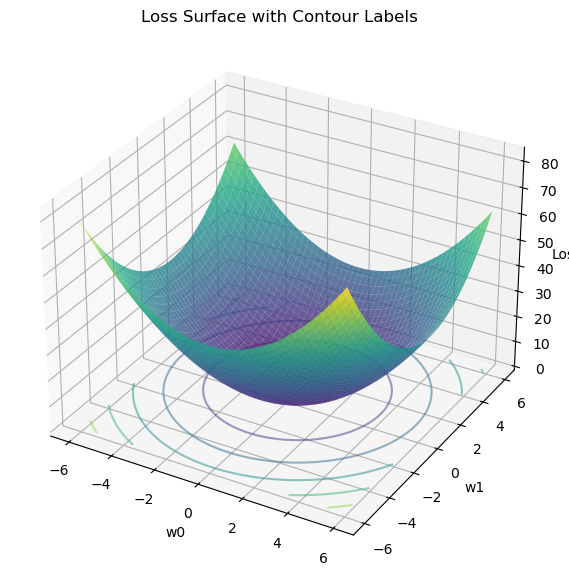

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(18, 7))

# Plot the surface
ax.plot_surface(w0_mesh, w1_mesh, loss_mesh, cmap='viridis', alpha=0.8)

# Create 2D contour plot
contour = ax.contour(w0_mesh, w1_mesh, loss_mesh, zdir='z', offset=0, cmap='viridis', alpha=0.5)

# Set labels for all axes
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Loss', labelpad=0.02)
ax.set_title('Loss Surface with Contour Labels')

plt.show()

# Gradient

In [ ]:
X = df['Radio'].values
X = np.c_[np.ones(X.shape[0]), X]
y = df['Sales'].values
y_hat = linear_function(X, w)
X.shape,y.shape, y_hat.shape


((570, 2), (570,), (570,))

In [ ]:
def calculate_gradient(X, y, y_hat):
    """Calculate gradients."""
    dLdw = -2 * np.dot(X.T, (y - y_hat)) / y.shape[0]
    return dLdw

dldw = calculate_gradient(X, y, y_hat)
dldw.shape




(2,)

In [136]:
epochs = 100
alpha = 0.01
batch_size = 3
w = np.random.uniform(4, 6, size=(2,))
w

array([5.53938945, 4.0559369 ])

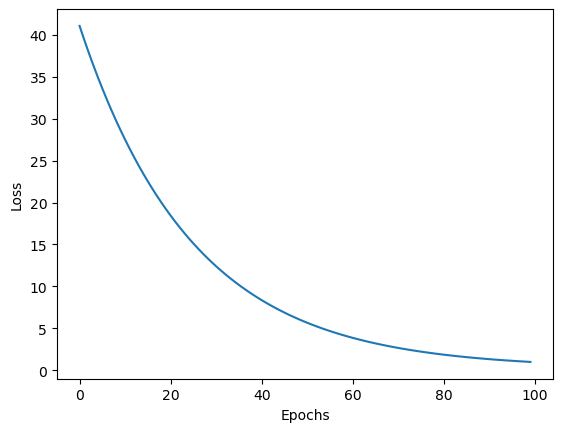

In [ ]:
# Trainning (mini-batch)
from sklearn.metrics import f1_score, accuracy_score
def GD_mini_batch(X_train, y_train, w, alpha, epochs):
    lossess = np.array([])
    w_collect = w.reshape(1, -1)

    for epoch in range(epochs):
        # Training loop

        #Calculate z
        y_hat = linear_function(X_train, w)

        #Calculate loss
        loss = calculate_loss(y_train, y_hat)
        lossess = np.append(lossess, loss)
        
        #Calculate gradient
        dldw = calculate_gradient(X_train, y_train, y_hat)
        if epoch == 0:
            dldw_collect = dldw.reshape(1, -1)
        else:
            dldw_collect = np.vstack((dldw_collect, dldw.reshape(1, -1)))

        # Update w
        w = w - alpha * dldw

        if epoch != epochs - 1:
            w_collect = np.vstack((w_collect, w.reshape(1, -1)))

    return lossess, dldw_collect, w_collect

lossess, dldw_collect, w_collect = GD_mini_batch(X, y, w, alpha, epochs)
plt.plot(lossess)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


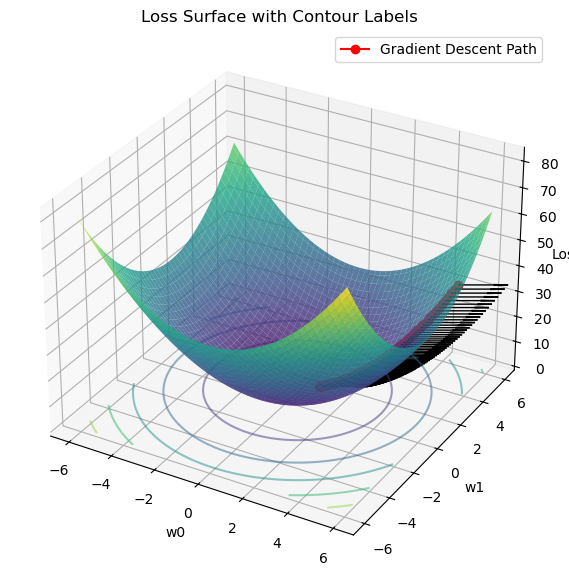

In [144]:
import numpy as np
import matplotlib.pyplot as plt

w0_range = np.linspace(-6, 6, 100)
w1_range = np.linspace(-6, 6, 100)
w0_mesh, w1_mesh = np.meshgrid(w0_range, w1_range)

w0_w1 = np.array([w0_mesh.ravel(), w1_mesh.ravel()])
y_hat = linear_function(X, w0_w1)
loss = calculate_loss(y.reshape(-1, 1), y_hat)
loss_mesh = loss.reshape(w0_mesh.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(18, 7))

# Plot the surface
ax.plot_surface(w0_mesh, w1_mesh, loss_mesh, cmap='viridis', alpha=0.8)

# Create 2D contour plot
contour = ax.contour(w0_mesh, w1_mesh, loss_mesh, zdir='z', offset=0, cmap='viridis', alpha=0.5)

# Plot the gradient descent path
ax.plot(w_collect[:, 0], w_collect[:, 1], lossess, color='red', marker='o', label='Gradient Descent Path')

# Normalize the gradient for better visualization
scale_factor = 0.5  # Adjust this to control arrow size
gradients = scale_factor * dldw_collect / np.linalg.norm(dldw_collect, axis=1, keepdims=True)

# Extract components for quiver
w0_points, w1_points = w_collect[:, 0], w_collect[:, 1]
grad_w0, grad_w1 = gradients[:, 0], gradients[:, 1]
loss_values = lossess  # Corresponding loss at each step

# Add gradient vectors to the 3D plot
ax.quiver(
    w_collect[:, 0], w_collect[:, 1], lossess,  # Starting points
    gradients[:, 0], gradients[:, 1], np.zeros_like(grad_w0),  # Gradient direction (no movement in loss axis)
    color='black', length=4, linewidth=1, arrow_length_ratio=0.3
)

ax.legend()

# Set labels for all axes
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Loss', labelpad=0.02)
ax.set_title('Loss Surface with Contour Labels')

plt.show()